In [7]:
import cv2 as cv
import os
import numpy as np
from glob import glob
import PIL.Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataDirsPath = '/Users/jerryhui/Desktop/Files/UGA/CS/8360DataPracticum/Projects/p2/project2/data/data/*'
dataDirs = glob(dataDirsPath)

maskDirPath = '/Users/jerryhui/Desktop/Files/UGA/CS/8360DataPracticum/Projects/p2/project2/masks'

In [4]:
hashcodeFilePath = '/Users/jerryhui/Desktop/Files/UGA/CS/8360DataPracticum/Projects/p2/project2/train.txt'
hashcodeSet = set()
with open(hashcodeFilePath, 'r') as f:
    for line in f:
        hashcodeSet.add(line.strip())

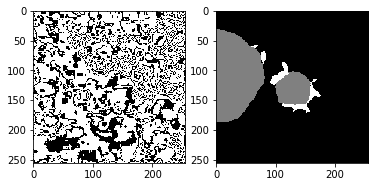

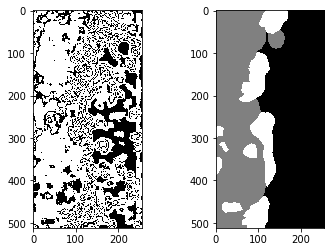

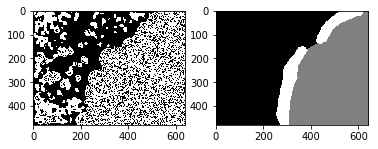

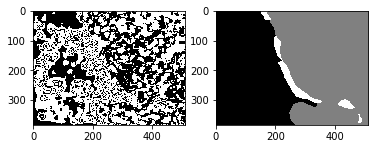

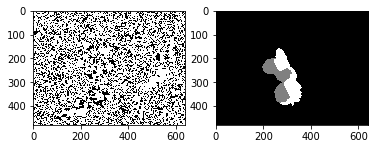

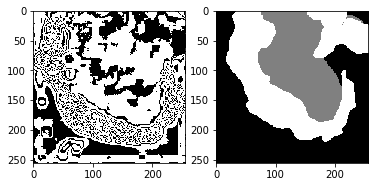

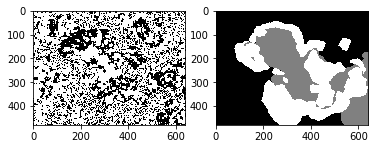

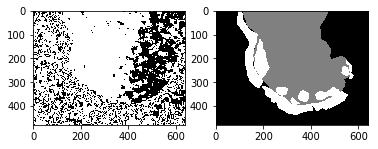

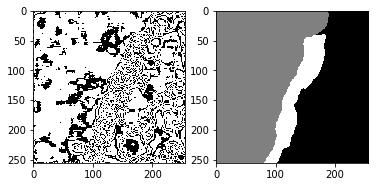

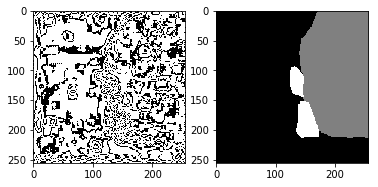

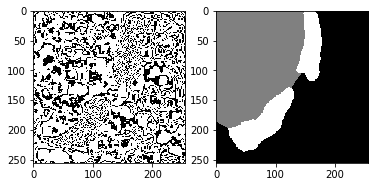

In [34]:
cnt = 1
for direc in dataDirs:
#     print(direc)
    hashcode = direc.split('/')[-1]
#     print(hashcode)
    if hashcode not in hashcodeSet:
        continue
        
    maskPath = os.path.join(maskDirPath, hashcode + '.png')
    curFrame = cv.imread(os.path.join(direc, 'frame0000.png'), 0)
    row, col = curFrame.shape
    
    hsv = np.zeros((row, col, 3), np.uint8)
    hsv[...,1] = 255
    total = np.zeros((row, col), np.uint8)

    for i in range(1, 100):
        preFrame = curFrame
        curFrame = cv.imread(os.path.join(direc, 'frame0' + str(i).zfill(3) + '.png'), 0)
        
        flow = cv.calcOpticalFlowFarneback(preFrame, curFrame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
#         print(flow.shape)
        
        mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
        
#         print(mag.shape)
#         print(ang.shape)
        
        hsv[...,0] = ang * 180 / np.pi / 2
        hsv[...,2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
        
        bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
        gray = cv.cvtColor(bgr,cv.COLOR_BGR2GRAY)
#         cv.imshow('frame2',bgr)
        total += gray
    
    total = total / np.max(total) * 256
    
    _, new_image = cv2.threshold(total, 80, 255, cv2.THRESH_BINARY)   
    
    mask = cv2.imread(maskPath, 0)
    
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(new_image, cmap='gray')
    axarr[1].imshow(mask, cmap='gray')
        
    if cnt > 10:
        break
    cnt += 1

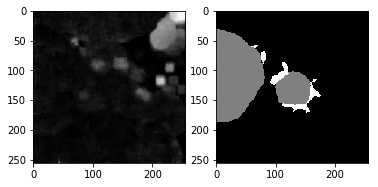

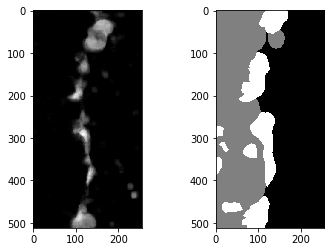

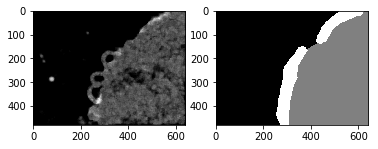

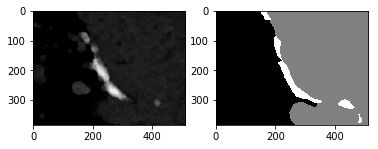

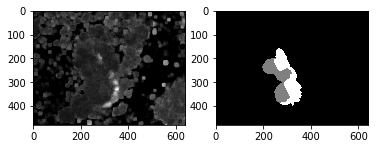

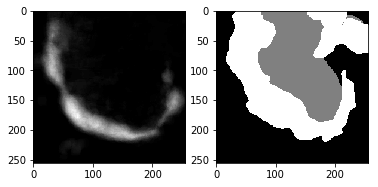

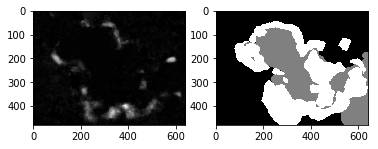

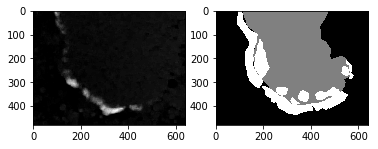

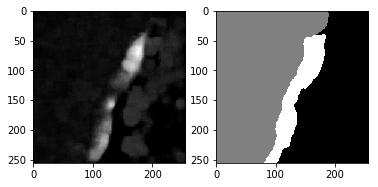

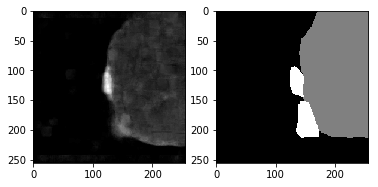

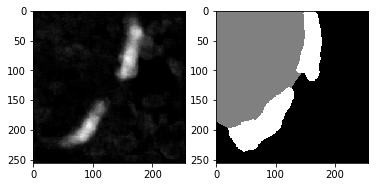

In [36]:
cnt = 1
for direc in dataDirs:
    hashcode = direc.split('/')[-1]
    if hashcode not in hashcodeSet:
        continue
        
    maskPath = os.path.join(maskDirPath, hashcode + '.png')
    curFrame = cv.imread(os.path.join(direc, 'frame0000.png'), 0)
    row, col = curFrame.shape
    
    hsv = np.zeros((row, col, 3), np.uint8)
    hsv[...,1] = 255
    total = np.zeros((row, col), np.uint8)

    for i in range(1, 100):
        preFrame = curFrame
        curFrame = cv.imread(os.path.join(direc, 'frame0' + str(i).zfill(3) + '.png'), 0)
        
        flow = cv.calcOpticalFlowFarneback(preFrame, curFrame, None, 0.5, 3, 15, 3, 5, 1.2, 0)        
        mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
        
        hsv[...,0] = ang * 180 / np.pi / 2
        hsv[...,2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
        
        bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
        gray = cv.cvtColor(bgr,cv.COLOR_BGR2GRAY)
#         total += gray

        for i in range(row):
            for j in range(col):
                if gray[i][j] >= 128:
                    total[i][j] += 2
                elif gray[i][j] >= 32:
                    total[i][j] += 1
    
    total = total / np.max(total) * 256
    
    _, new_image = cv2.threshold(total, 128, 255, cv2.THRESH_BINARY)   
    
    mask = cv2.imread(maskPath, 0)
    
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(total, cmap='gray')
    axarr[1].imshow(mask, cmap='gray')
        
    if cnt > 10:
        break
    cnt += 1

In [60]:
cnt = 1
trainData = []
varLabel = [[] for _ in range(3)]

for direc in dataDirs:
    hashcode = direc.split('/')[-1]
    if hashcode not in hashcodeSet:
        continue
        
    maskPath = os.path.join(maskDirPath, hashcode + '.png')
    curFrame = cv.imread(os.path.join(direc, 'frame0000.png'), 0)
    row, col = curFrame.shape
    
    hsv = np.zeros((row, col, 3), np.uint8)
    hsv[...,1] = 255
    total = np.zeros((row, col), np.uint8)

    mask = cv.imread(maskPath, 0)
    
    for i in range(1, 100):
        preFrame = curFrame
        curFrame = cv.imread(os.path.join(direc, 'frame0' + str(i).zfill(3) + '.png'), 0)
        
        flow = cv.calcOpticalFlowFarneback(preFrame, curFrame, None, 0.5, 3, 15, 3, 5, 1.2, 0)        
        mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
        
        hsv[...,0] = ang * 180 / np.pi / 2
        hsv[...,2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
        
        bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
        gray = cv.cvtColor(bgr,cv.COLOR_BGR2GRAY)
#         total += gray

        for i in range(row):
            for j in range(col):
                if gray[i][j] >= 128:
                    total[i][j] += 2
                elif gray[i][j] >= 32:
                    total[i][j] += 1
    
    total = total / np.max(total) * 256
    
    for i in range(row):
        for j in range(col):
            trainData.append((total[i][j], mask[i][j]))
            if mask[i][j] == 0:
                varLabel[0].append(total[i][j])
            elif mask[i][j] == 1:
                varLabel[1].append(total[i][j])
            else:
                varLabel[2].append(total[i][j])
                
    if cnt > 10:
        break
    cnt += 1

In [41]:
def getIOU(trainData, threshold):
    """
    calculate the IOU give the data and the propopsed threshold

    trainData: type: list, dimension: (N, 2), where the 1st column is scaled 
                     variance (0-256), the 2nd column is the label (0, 1, 2)
    threshold: current threshold
    return, type, float, the IOU
    """
    intersection, union = 0, 0
    for fea, label in trainData:
        if label == 2 or fea >= threshold:
            union += 1
        if label == 2 and fea >= threshold:
            intersection += 1
    return intersection * 1.0 / union

In [73]:
def calculateThreshold(trainData):
    """
    trainData: type: list, dimension: (N, 2), where the 1st column is scaled 
                     variance (0-256), the 2nd column is the label (0, 1, 2)

    return, type, float the threshold
    """
    cur = 123
    step = 5
    curIOU = getIOU(trainData, cur)
    preIOU = 0

    while abs(curIOU - preIOU) >= 1e-3:
        preIOU = curIOU
        cur += step
        curIOU = getIOU(trainData, cur)
        print('%f, %f, %f, %f' % (curIOU, preIOU, cur, step))
        if curIOU < preIOU:
            step = step * (-0.2)
    return curIOU, cur

In [74]:
IOU, threshold = calculateThreshold(trainData)

0.083463, 0.089238, 128.000000, 5.000000
0.083463, 0.083463, 127.000000, -1.000000


In [76]:
for th in range(5, 131, 5):
    print(th, getIOU(trainData, th))

5 0.15498265753170876
10 0.15124912454209802
15 0.15551894360113538
20 0.155341155119064
25 0.1564445839669845
30 0.16125156494458998
35 0.16669584568929574
40 0.16652332273165438
45 0.16580522222794458
50 0.16797550057641797
55 0.16575072153731246
60 0.16600433972429404
65 0.1653623486578763
70 0.16401571648004273
75 0.16103182888199594
80 0.1571439320784058
85 0.15108692736830812
90 0.14524877857709914
95 0.1385172767273952
100 0.12945227590659636
105 0.12130021657268843
110 0.1116717293929877
115 0.10371304011391602
120 0.09401554799861724
125 0.08567766145435282
130 0.07978786045246149


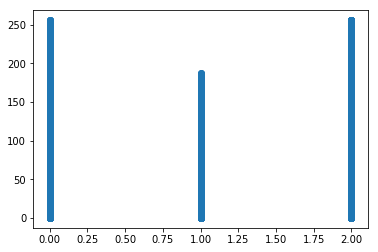

In [63]:
trainNP = np.array(trainData)
plt.scatter(trainNP[:,1], trainNP[:,0])
plt.show()

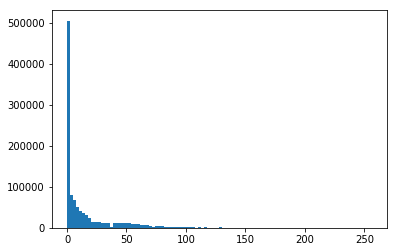

In [67]:
plt.hist(varLabel[0], bins=100, range=(0,256))
plt.show()

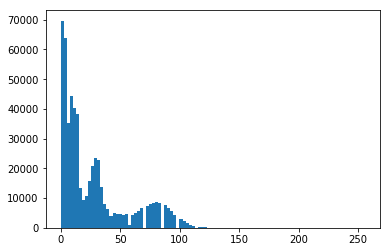

In [68]:
plt.hist(varLabel[1], bins=100, range=(0,256))
plt.show()

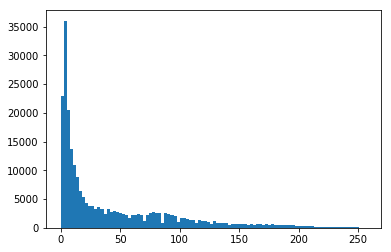

In [69]:
plt.hist(varLabel[2], bins=100, range=(0,256))
plt.show()

In [ ]:
prev = 

hsv = np.zeros_like(frame1)
hsv[...,1] = 255
while(1):
    ret, frame2 = cap.read()
    next = cv.cvtColor(frame2,cv.COLOR_BGR2GRAY)
    flow = cv.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv.normalize(mag,None,0,255,cv.NORM_MINMAX)
    bgr = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
    cv.imshow('frame2',bgr)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv.imwrite('opticalfb.png',frame2)
        cv.imwrite('opticalhsv.png',bgr)
    prvs = next
cap.release()
cv.destroyAllWindows()

In [ ]:
        s = (prvs.shape[0], prvs.shape[1], 3)   # hsv image shape

        hsv = np.zeros(s, np.uint8)
        hsv[...,1] = 255
        
        ms = (prvs.shape[0], prvs.shape[1])     # mask shape
        
        mask = np.zeros(ms, np.uint8)
        sum_mask = np.zeros(ms, np.uint8)
        scaled_mask = np.zeros(ms, np.uint8)
        
        print("dir: ",dcount," dim: ",sum_mask.shape)
        dcount += 1
        
        flag = 0

        for i in range(1,100):
            nxt = cv2.imread(d + 'frame00'+str(i).zfill(2)+'.png', 0)   # next image
            flow = cv2.calcOpticalFlowFarneback(prvs,nxt, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])    # calculates magnitude and angles of 2D vectors
            
            hsv[...,0] = ang*180/np.pi/2
            
            hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
            bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
            omg = cv2.cvtColor(bgr,cv2.COLOR_BGR2GRAY)
    #       print(omg.dtype)
    #       print(omg.shape)
            
            cv2.imshow('frame1',omg)
            om = Image.fromarray(omg)
            om.save(opath+'/each_image/'+h+'/frame00'+str(i).zfill(2)+'.png', 0)
            
            omg2 = omg

            # scaling with random hardcoded values
            for r in range(omg2.shape[0]):
                for c in range(omg2.shape[1]):
                    if omg2[r][c] < 32:
                        sum_mask[r][c] += 0
                    elif omg2[r][c] < 128:
                        sum_mask[r][c] += 1
                    else:
                        sum_mask[r][c] += 2

            flag = cv2.waitKey(30) & 0xff
            if flag == 27:      # press ESC to exit
                break

            prvs = nxt

        # generating mask based on sum_mask again based on random hardcoded values
        for r in range(prvs.shape[0]):
            for c in range(prvs.shape[1]):
                if sum_mask[r][c] > 50:
                    mask[r][c] = 2
                    scaled_mask[r][c] = 255
                elif sum_mask[r][c] > 15:
                    mask[r][c] = 1
                    scaled_mask[r][c] = 128
        omask = Image.fromarray(mask)
        omask.save(opath+'/masks/'+h+'.png', 0)
        osmask = Image.fromarray(scaled_mask)
        osmask.save(opath+'/scaled_masks/'+h+'.png', 0)

    cv2.destroyAllWindows()
